<a href="https://colab.research.google.com/github/ParagAB/Neural-Network-and-Artificial-Intelligece/blob/master/Assignment_1_CIFAR_10_Image_Classification_ipnyb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR Image Classification Assignment

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


## CIFAR image classification using Multi layer Perceptron

In [2]:
batch_size = 256
num_classes = 10
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#Data Normaliation
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170500096/170498071 [==============================] - 118s 1us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Function to create and train the model

In [0]:
def model_trainer(model,learning_rate,epochs):
  # initiate adam optimizer
  opt = keras.optimizers.adam(lr=learning_rate,)

  # We'll train the model using adam
  model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

  trained_record =model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
  
  return trained_record

In [0]:
def plotter(trained_record):
    # Loss Curves
    plt.figure(figsize=[8,6])
    plt.plot(trained_record.history['loss'],'r',linewidth=3.0)
    plt.plot(trained_record.history['val_loss'],'b',linewidth=3.0)
    plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.title('Loss Curves',fontsize=16)
    plt.savefig('try1.png')
    # Accuracy Curves
    plt.figure(figsize=[8,6])
    plt.plot(trained_record.history['acc'],'r',linewidth=3.0)
    plt.plot(trained_record.history['val_acc'],'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)

    plt.savefig('try2.png')


### Image Classification using MultiLayer perceptron

In [0]:
#####MLP
model = Sequential()
model.add(Dense(64,input_shape=(x_train.shape[1:])))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32, 32, 64)        256       
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
dense_26 (Dense)             (None, 16, 16, 128)       8320      
_________________________________________________________________
activation_29 (Activation)   (None, 16, 16, 128)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
__________

In [6]:
history= model_trainer(model, 0.0003,20)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 272us/step - loss: 1.9793 - acc: 0.2934 - val_loss: 1.9468 - val_acc: 0.3183
Epoch 2/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.7504 - acc: 0.3883 - val_loss: 1.8548 - val_acc: 0.3351
Epoch 3/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.6463 - acc: 0.4251 - val_loss: 1.7354 - val_acc: 0.3831
Epoch 4/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.5784 - acc: 0.4460 - val_loss: 1.6357 - val_acc: 0.4274
Epoch 5/20
50000/50000 [==============================] - 10s 199us/step - loss: 1.5288 - acc: 0.4627 - val_loss: 1.5895 - val_acc: 0.4392
Epoch 6/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.4927 - acc: 0.4741 - val_loss: 1.5727 - val_acc: 0.4530
Epoch 7/20
50000/50000 [==============================] - 10s 195us/step - loss: 1.4623 - acc: 0.4843 - val_loss: 1.

## Evaluation score after training model using 

In [8]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 136us/step


[1.4382149541854858, 0.4889]

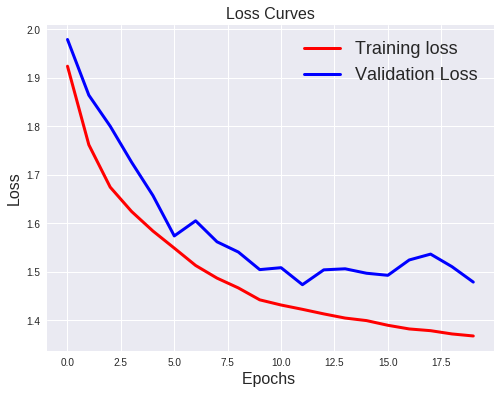

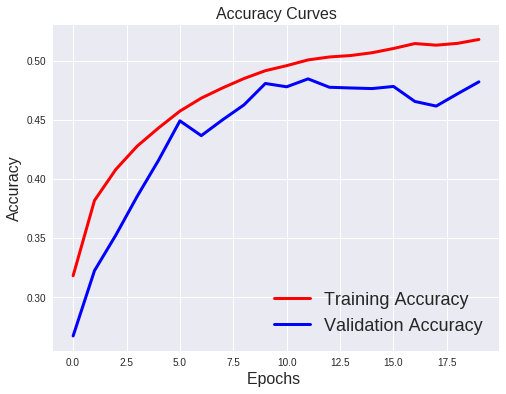

In [0]:
plotter(history)

## Convolutional Neural Network

In [0]:
CNNmodel = Sequential()
#####################
## Convolutional Neural Network
CNNmodel.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
CNNmodel.add(Activation('relu'))
CNNmodel.add(Conv2D(64, (3, 3)))
CNNmodel.add(Activation('relu'))
CNNmodel.add(MaxPooling2D(pool_size=(3, 3)))
CNNmodel.add(Dropout(0.25))

CNNmodel.add(Conv2D(128, (3, 3), padding='same'))
CNNmodel.add(Activation('relu'))
CNNmodel.add(Conv2D(128, (3, 3)))
CNNmodel.add(Activation('relu'))
CNNmodel.add(MaxPooling2D(pool_size=(3, 3)))
CNNmodel.add(Dropout(0.25))

CNNmodel.add(Flatten())
CNNmodel.add(Dense(512))
CNNmodel.add(Activation('relu'))
CNNmodel.add(Dropout(0.3))
CNNmodel.add(Dense(num_classes))
CNNmodel.add(Activation('softmax'))

##################

In [11]:
CNNmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        36928     
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
__________

In [12]:
CNN_history = model_trainer(CNNmodel,0.002,25)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 14s 273us/step - loss: 0.5695 - acc: 0.7985 - val_loss: 0.6311 - val_acc: 0.7856
Epoch 2/25
50000/50000 [==============================] - 13s 259us/step - loss: 0.5540 - acc: 0.8036 - val_loss: 0.6349 - val_acc: 0.7820
Epoch 3/25
50000/50000 [==============================] - 13s 259us/step - loss: 0.5500 - acc: 0.8066 - val_loss: 0.6377 - val_acc: 0.7863
Epoch 4/25
50000/50000 [==============================] - 13s 259us/step - loss: 0.5377 - acc: 0.8117 - val_loss: 0.6252 - val_acc: 0.7943
Epoch 5/25
50000/50000 [==============================] - 13s 259us/step - loss: 0.5279 - acc: 0.8140 - val_loss: 0.6415 - val_acc: 0.7841
Epoch 6/25
50000/50000 [==============================] - 13s 259us/step - loss: 0.5264 - acc: 0.8147 - val_loss: 0.6096 - val_acc: 0.7963
Epoch 7/25
50000/50000 [==============================] - 13s 259us/step - loss: 0.5272 - acc: 0.8136 - val_loss: 0.

Evaluation score using convolutional neural networks

In [13]:
CNNmodel.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 161us/step


[0.6089249066829682, 0.7952]

Graphical Representation of Loss and Accuracy

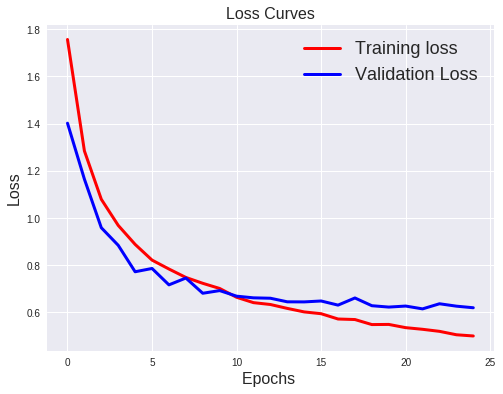

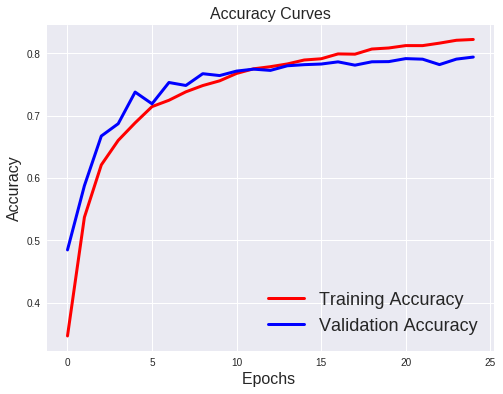

In [0]:
plotter(CNN_history)

In [0]:
plot_model(model,'model_design.png')